# Project: Investigate TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, crew, cast, revenue...etc.

> In this notebook, I will try to analyze this data and answer some questions that might give us (or the movies industry) some insights to help build a decision.

> Questions I ask are like: Which genres are most popular from year to year?, What Kinds of properties are associated with movies that have high revenues?, 


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### A quick overview on our data

In [62]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [63]:
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### So, as we start looking at our data we're inspired with some questions to ask like:

**Q1) Does the runtime of a movie affects its popularity? <br>
Q2) Does the release month affects revenues?<br>
Q3) Who are the most popular directors? <br>
Q4) What are the most popular production companies? <br>**

In [64]:
df.shape

(10866, 21)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [66]:
# Dropping Duplicate values:
df = df.drop_duplicates()

In [67]:
df.shape

(10865, 21)

#### i.e. 1 duplicate was found and removed

In [68]:
# Checking for null values in each column 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### As per seen from viewing our data's attributes:
>We've got a total of 10866 movies, only of which 10856 are movies that have an imdb page. <br>
The homepage attribute has the largest null values count, following it tagline then keywords then production_companies then cast then director then genres. <br>

>We will return to clean the NAN values in the data cleaning Part



### Let's start getting acquainted to our data and build some intuition!


In [69]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Insights:
 The maximum revenues of all was 2.781506e+09 having a budget of 4.250000e+08 while the minimum was zero (Interesting I wonder what movie has the the lowest revenue!)<br>
 The movies are between 1960 and 2015.<br>
 The average no. of votes on a movie is 217 votes and the total no. of votes were 10865.<br>
 50% of te movies were nefore 2006!

In [70]:
# The movie with the maximum revenue
df[df['revenue'] == df['revenue'].max()].original_title

1386    Avatar
Name: original_title, dtype: object

**Woow its Avatar!**

In [71]:
# The movie with the minimum revenue
df[df['revenue'] == df['revenue'].min()].original_title.count()

6016

**Turns out its not an only 1 movie, there are plenty!! Let's view their records.**

In [72]:
df[df['revenue'] == df['revenue'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


### Now let's get some visual intuition!

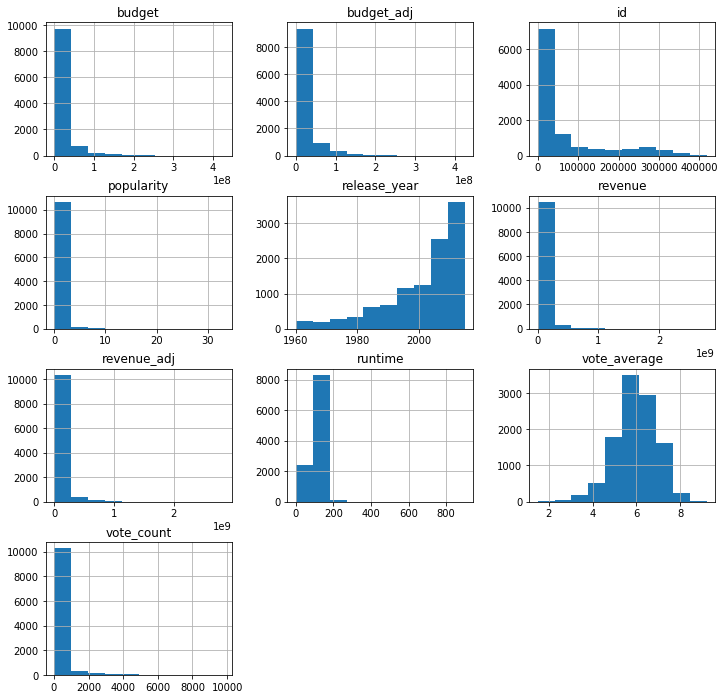

In [73]:
df.hist(figsize=(12,12));

## Data Cleaning 
#### As we discussed before, we've already removed the duplicates in the data set, Now let's remove the null values!!

In [74]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### let's first make a new copy to clean the data set
An important remark to put in mind is that we could have different types of NaN, either **float/int** or **string** (objects) so both must be handled separately, but here is not the case, all of attributes that contain Nan are all **Objects**!

In [75]:
cleaned_df = df.copy()

In [76]:
cleaned_df.fillna("empty", inplace=True)

Let's check our data now!

In [77]:
cleaned_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

***There are some irrelevant columns, let's remove them***

In [78]:
cleaned_df.shape

(10865, 21)

In [79]:
cleaned_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [80]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10865 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
homepage                10865 non-null object
director                10865 non-null object
tagline                 10865 non-null object
keywords                10865 non-null object
overview                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj           

***The id column should be string***

In [81]:
cleaned_df['id'] = cleaned_df['id'].astype(str)

let's check its type:

In [82]:
cleaned_df['id'].dtype

dtype('O')

***Let's change the release date to standard date time***

In [83]:
cleaned_df.release_date = pd.to_datetime(cleaned_df['release_date'])

In [84]:
cleaned_df['release_date'].sample(1)

8671   2000-05-19
Name: release_date, dtype: datetime64[ns]

***Let's drop the rows that have zero revenues or zero budget or zero popularity or zero runtime as they are irrelevant***

In [85]:
cleaned_df_no_zeros = cleaned_df[(cleaned_df[['runtime','revenue', 'budget', 'popularity']] != 0).all(axis=1)]

In [86]:
cleaned_df_no_zeros.shape

(3854, 21)

Perfect!! We're now ready to getting started to ask questions.

<a id='eda'></a>
## Exploratory Data Analysis

Let's get to answer our proposed questions!



### Q1) Does the runtime of a movie affects its popularity?

I have a hypothesis that longer movies are not that popular because people get bored and may walk out of a film, so let's test this from different perspective.

*First let's find out some info about the runtime!*

In [87]:
cleaned_df_no_zeros['runtime'].mean()

109.22029060716139

In [88]:
cleaned_df_no_zeros['runtime'].max()

338

In [89]:
cleaned_df_no_zeros['runtime'].min()

15

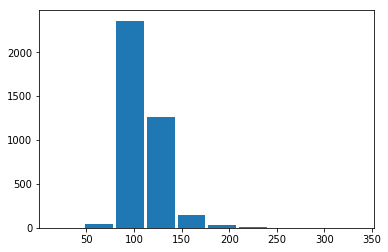

In [126]:
plt.hist(cleaned_df_no_zeros['runtime'], rwidth = 0.9);

*Now let's take a straight forward path and investigate the correlation between 2 values:*

In [90]:
# Top 5 famous movies
famous_of_df = cleaned_df_no_zeros.sort_values(by='popularity', ascending=False).iloc[:10]

# We use this to get the name of th movie instead of the ID
famous_of_df.set_index('original_title', inplace=True)

# printing the top films with their run time(according to popularity)
famous_of_df['runtime']

original_title
Jurassic World                           124
Mad Max: Fury Road                       120
Interstellar                             169
Guardians of the Galaxy                  121
Insurgent                                119
Captain America: The Winter Soldier      136
Star Wars                                121
John Wick                                101
Star Wars: The Force Awakens             136
The Hunger Games: Mockingjay - Part 1    123
Name: runtime, dtype: int64

Text(0.5,1,'Popularity and Runtime')

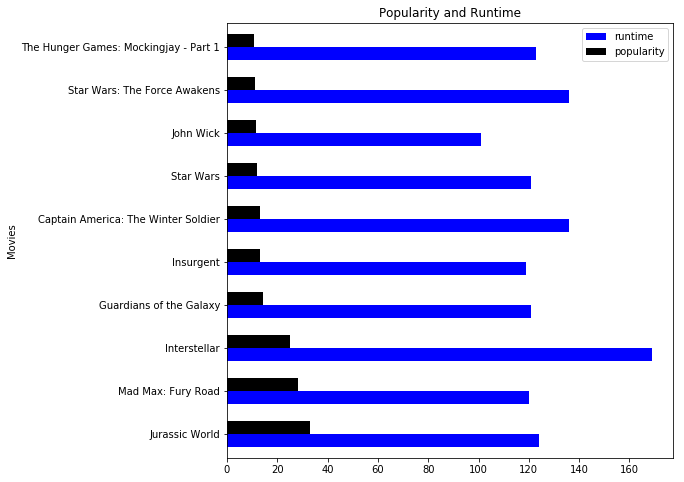

In [91]:
famous_of_df[['runtime', 'popularity']].plot.barh(figsize=(8,8),width=0.6,color=['blue', 'black'])
plt.ylabel('Movies')
plt.title('Popularity and Runtime')

### **Conclusion**:

> No correlation could be found between runtime and and popularity of movie, as per seen from our plot.

### Q2) Does the season of release affect revenues?

#### Hypothesis
> People are more likely to go to the movies during warmer seasons to avoid going out in the cold so revenues will be greater then..

In [92]:
hypothesis2_df = cleaned_df.copy()

In [93]:
hypothesis2_df = hypothesis2_df[hypothesis2_df['release_date'].notna()]

In [94]:
hypothesis2_df['release_month'] = pd.DatetimeIndex(df['release_date']).month

let's first look at the production numbers in each month..

In [95]:
release_months_production = hypothesis2_df.release_month.value_counts()

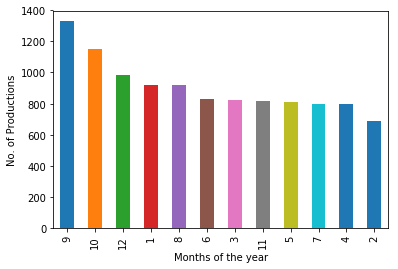

In [103]:
ax = release_months_production.plot(kind="bar")
ax.set_xlabel("Months of the year")
ax.set_ylabel("No. of Productions")
ax

Now let's look at the revenues with each month!

In [105]:
revenues_in_month = hypothesis2_df.groupby('release_month').sum()['revenue']

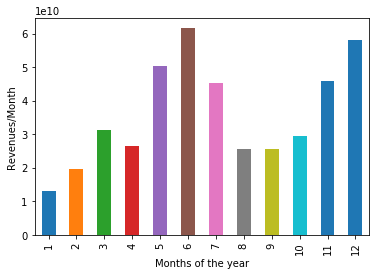

In [110]:
ax = revenues_in_month.plot(kind='bar')
ax.set_xlabel("Months of the year")
ax.set_ylabel("Revenues/Month")
ax

### **Conclusion**:
>Although the months 5,6,7 were not the the highest months in production (they were near avg), they were among the highest months with revenues...

### Q3) Who are the most popular directors?

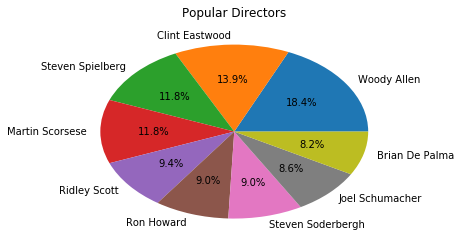

In [128]:
directors_df = cleaned_df.director.value_counts().head(10)
directors_df = directors_df[directors_df.keys() != 'empty']

plt.pie(x=directors_df, labels=directors_df.keys(), autopct='%.1f%%')
plt.title('Popular Directors', fontsize=12);


### Q4) What are the most popular production companies?

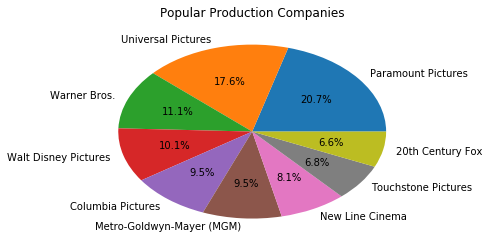

In [121]:
production_companies_df = cleaned_df.production_companies.value_counts().head(10)
production_companies_df = production_companies_df[production_companies_df.keys() != 'empty']

plt.pie(x=production_companies_df, labels=production_companies_df.keys(), autopct='%.1f%%')
plt.title('Popular Production Companies', fontsize=12);


Wow, Although Disney mostly generates animated films, but look at the acquisition of popularity!

<a id='conclusions'></a>
## Dataset Limitations

> The dataset contains some hardships:<br>
First, this data set only covers movies from 1960 to 2015 as we said in the beginning, which is a very small range.<br>
Second, genres and cast of movies are concatenated.<br>
Third, some columns were irrelevant and also contained null values which are very hard to imply.<br>



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0